In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [2]:
df = pd.read_csv("census-income_.csv",na_values='?',skipinitialspace=True)

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  Unnamed: 14     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Checking Null Values


In [6]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Unnamed: 14          0
dtype: int64

- we can see some null values present in the column `workclass`, `occupation`, `native-country`. Let's treat them... 

In [7]:
df['native-country'].value_counts()

native-country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

## Data Modeling

## Replacing missing values

In [8]:
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])

In [9]:
df[(df['workclass'].isnull()) & (df['occupation'].isnull())]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Unnamed: 14
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,United-States,<=50K
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32531,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32541,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [10]:
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

- As we can see the most of the missing value in `workclass` & `occupation` are same.

In [11]:
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])

In [12]:
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])

- Let's Rename the `Unnamed: 14` to `annual_income`.

In [13]:
df = df.rename(columns={'Unnamed: 14' : 'annual_income'})

In [14]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [16]:
df[df.duplicated()].shape

(24, 15)

- We can see there are 24 duplicate rows in the data. Let's drop them.


In [17]:
df = df.drop_duplicates()

In [18]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


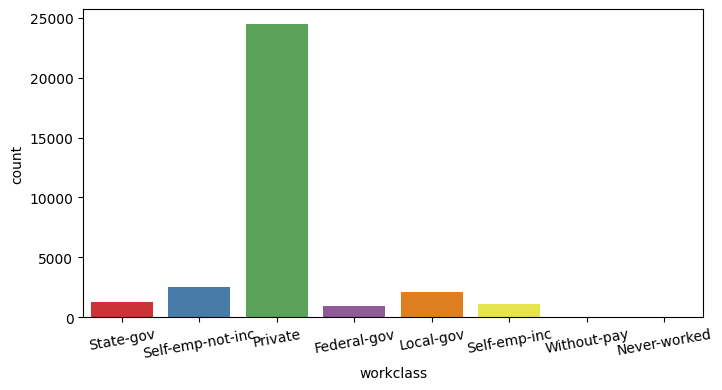

In [20]:
# Workclass 
plt.figure(figsize=(8,4))

sns.countplot(x = df['workclass'], hue = df['workclass'], palette="Set1")
plt.xticks(rotation = 10)
plt.show()

- We can see that majority of the people works in Private Sector.

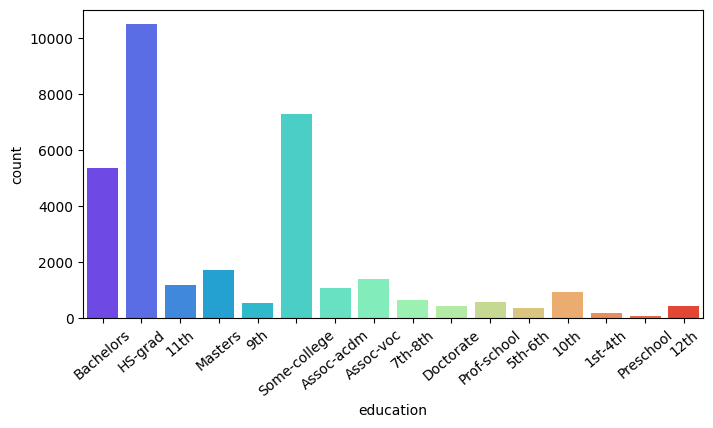

In [21]:
# Education Column
plt.figure(figsize=(8,4))

sns.countplot(x = df['education'], hue = df['education'],  palette='rainbow')
plt.xticks(rotation = 40)
plt.show()

we can see that majority of the people have education level as `HS-grad`, followed by `Some-college` and `Bachelors`.

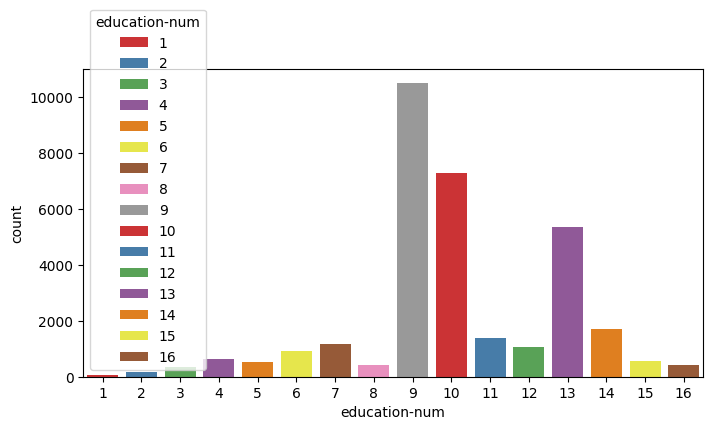

In [22]:
# Education Column
plt.figure(figsize=(8,4))

sns.countplot(x = df['education-num'], hue = df['education-num'], palette="Set1")
plt.show()

In [23]:
df['education'].value_counts(),  df['education-num'].value_counts()

(education
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
 Name: count, dtype: int64,
 education-num
 9     10494
 10     7282
 13     5353
 14     1722
 11     1382
 7      1175
 12     1067
 6       933
 4       645
 15      576
 5       514
 8       433
 16      413
 3       332
 2       166
 1        50
 Name: count, dtype: int64)

- we can observe that both  `education` & `education-num` contains 16 different values and contains exactly same value counts.  The `Education_num` column is providing same information as `Education` column, but in a numeric manner!

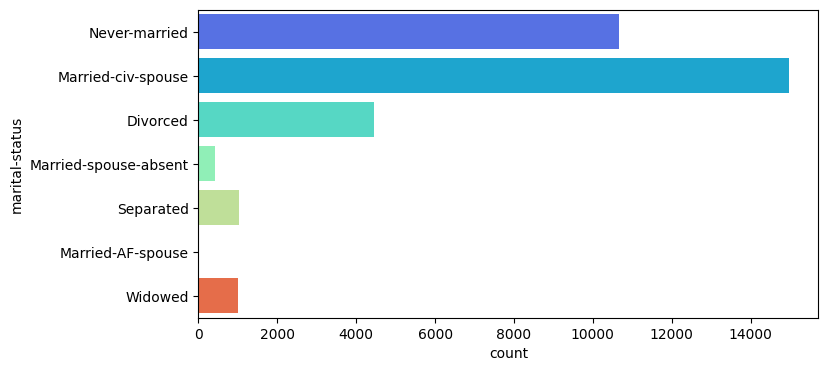

In [24]:
# Marital Status Column
plt.figure(figsize=(8,4))

sns.countplot(y = df['marital-status'], hue = df['marital-status'],  palette='rainbow')
plt.show()

- We can see that Majority of the people have `marital-status` as `Married-civ-spouse` and count of `Never-married`(Unmarried) is also quite high and `Married-AF-spouse` have least count.  

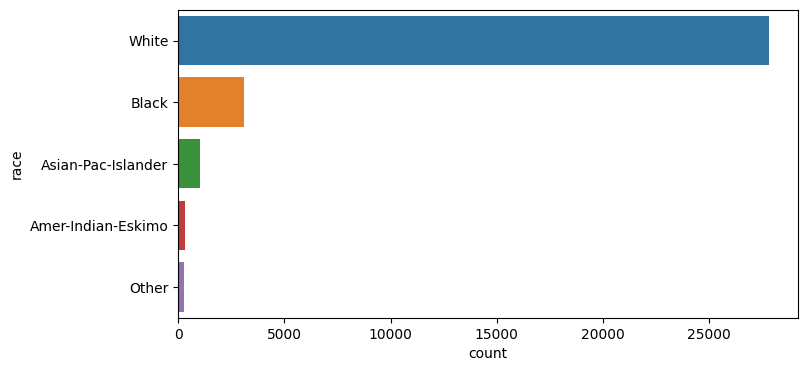

In [25]:
# Marital Status Column
plt.figure(figsize=(8,4))

sns.countplot(y = df['race'], hue = df['race'])
plt.show()

- We can see that Majority of the population is `White` and 2nd majority is `Black`.

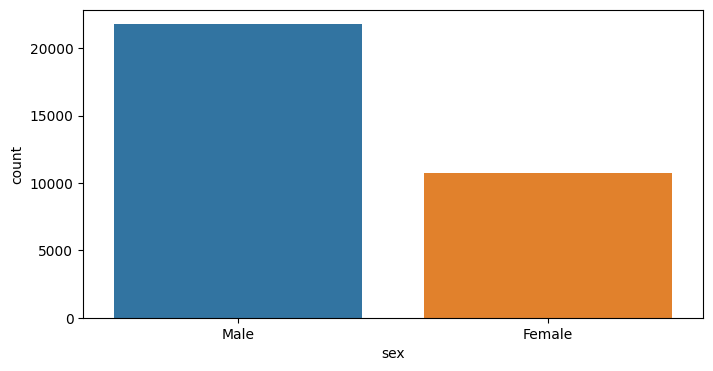

In [26]:
#Sex
plt.figure(figsize=(8,4))

sns.countplot(x = df['sex'], hue = df['sex'])
plt.show()

- Majority of populations are `Males`, almost double of the `Female` ratio.

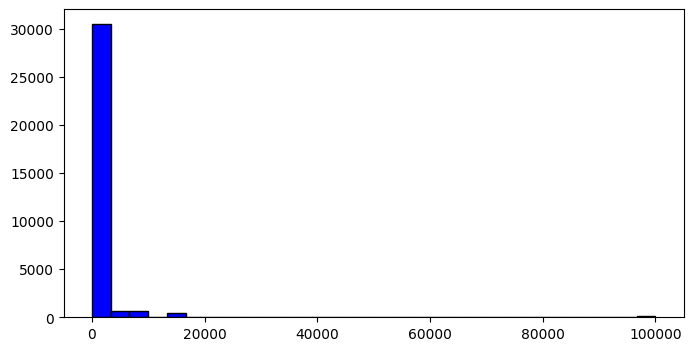

In [27]:
# Capital Gain
plt.figure(figsize=(8,4))

plt.hist(x = df['capital-gain'], bins=30, color='blue', edgecolor='black')
plt.show()

- Majority of the values set as 0 and histogram plot is `highly right skewed`.

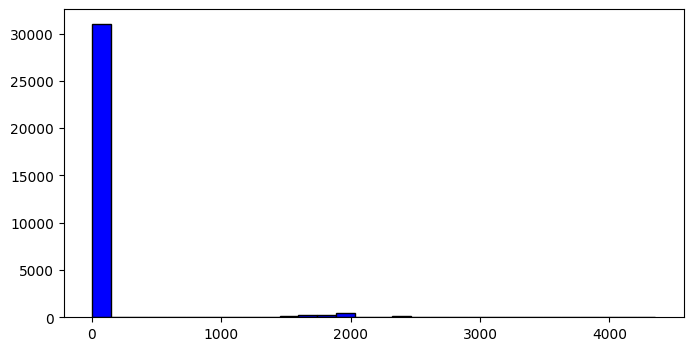

In [28]:
# Capital Loss column
plt.figure(figsize=(8,4))

plt.hist(x = df['capital-loss'], bins=30, color='blue', edgecolor='black')
plt.show()

- Majority of the values set as 0 similar to capital-gain and histogram plot is `highly right skewed` as well.

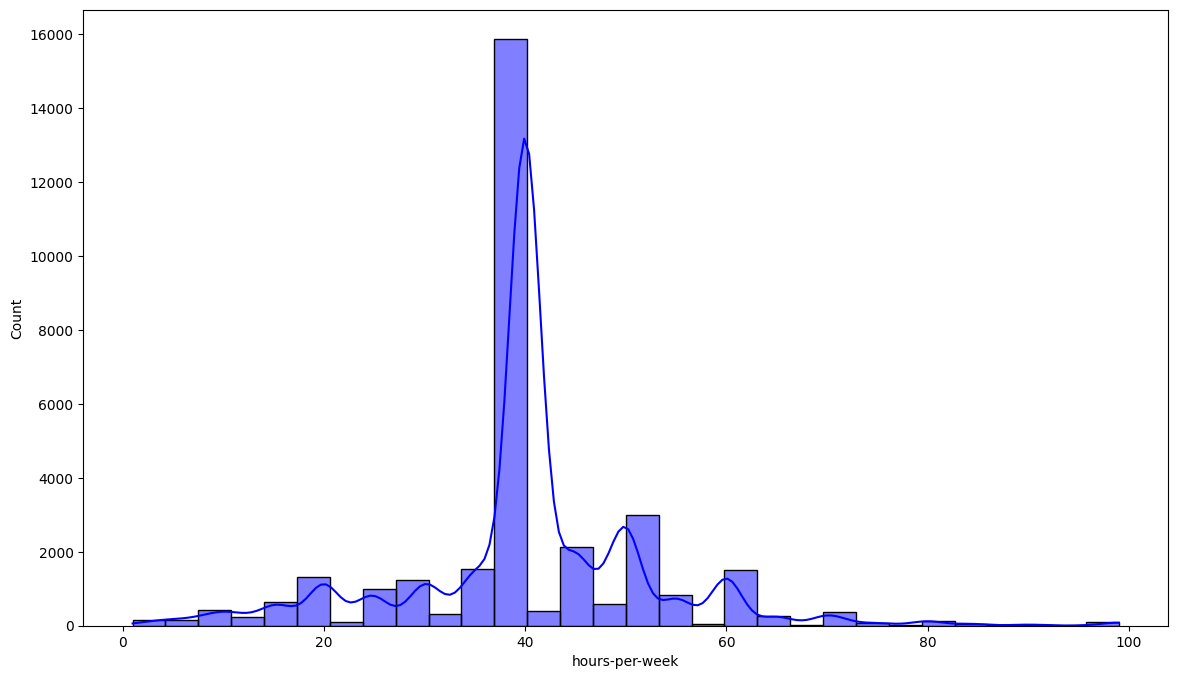

In [29]:
plt.figure(figsize=(14,8))

sns.histplot(df['hours-per-week'], kde = True, bins=30, color='blue')
plt.show()

- We can the high peak near `40 hours` so majority of the values lies near `40 Hours per week`.

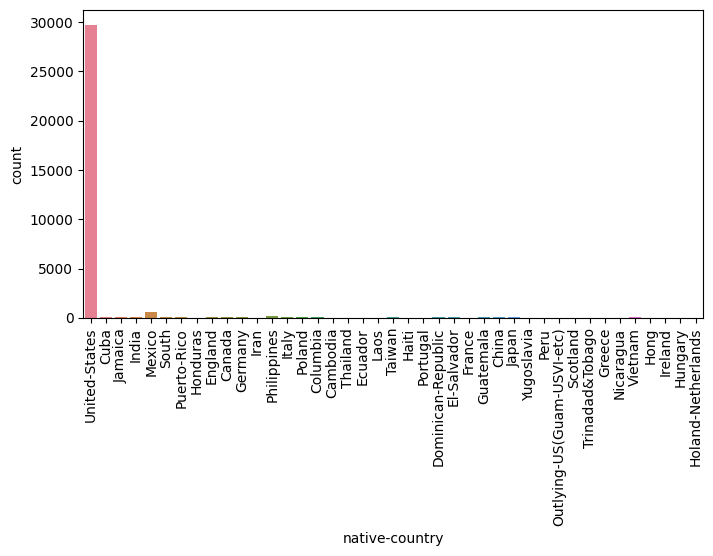

In [30]:
# Native Country
plt.figure(figsize=(8,4))

sns.countplot(x= df['native-country'], hue = df['native-country'])
plt.xticks(rotation = 90)
plt.show()

- The `Native-country` column contains highest count of `United-States`.

### Let's Check now how Income get impacted due to the features. 

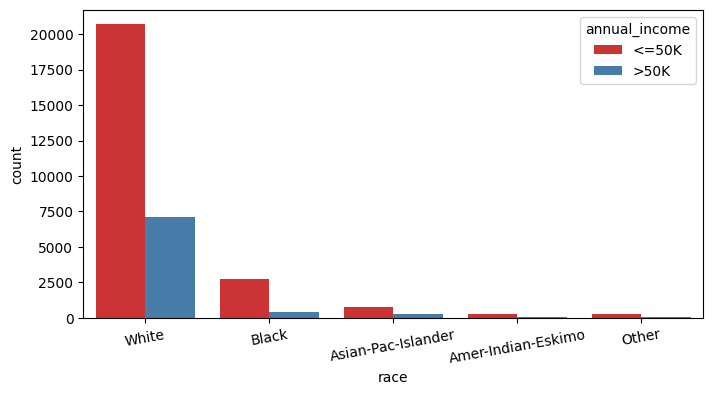

In [31]:
# Income VS Race
plt.figure(figsize=(8,4))

sns.countplot(x = df['race'], hue = df['annual_income'], palette='Set1')
plt.xticks(rotation = 10)
plt.show()

- The plot shows that the majority of individuals who earn `>50K` are `Asian-Pac-islander`, with a significant count also earning `>50K`. 

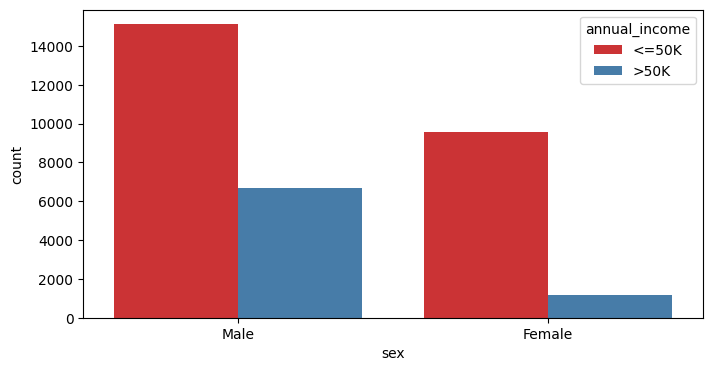

In [32]:
# Income VS Sex
plt.figure(figsize=(8,4))

sns.countplot(x = df['sex'], hue = df['annual_income'], palette='Set1')
plt.show()

- `Males` have a higher chance of earning `>50K` than Females.

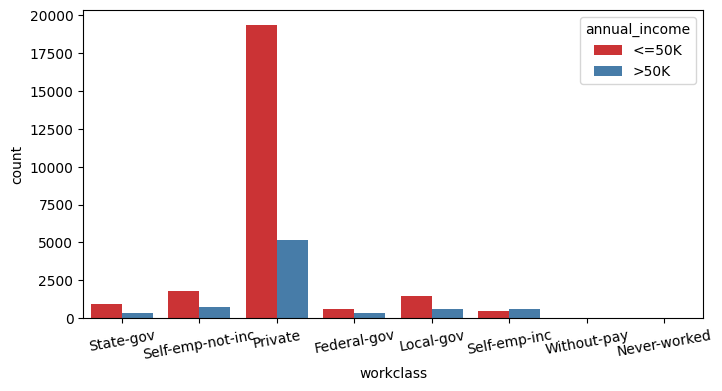

In [33]:
# Income VS Workclass
plt.figure(figsize=(8,4))

sns.countplot(x = df['workclass'], hue = df['annual_income'], palette='Set1')
plt.xticks(rotation = 10)
plt.show()

- Ratio of People earning in `Self-emp-inc` is higher than other Workclass.

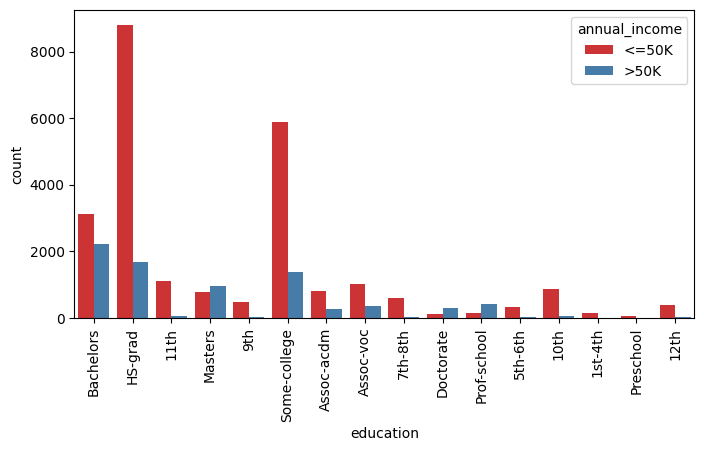

In [34]:
# Income VS Education
plt.figure(figsize=(8,4))

sns.countplot(x = df['education'], hue = df['annual_income'], palette='Set1')
plt.xticks(rotation = 90)
plt.show()

- People with education level as `Masters/Doctorate/Prof-school` have higher ratios of `>50K` earning. `Bachelors` degree also has around 10:7 ratio of `<=50K : >50K`.

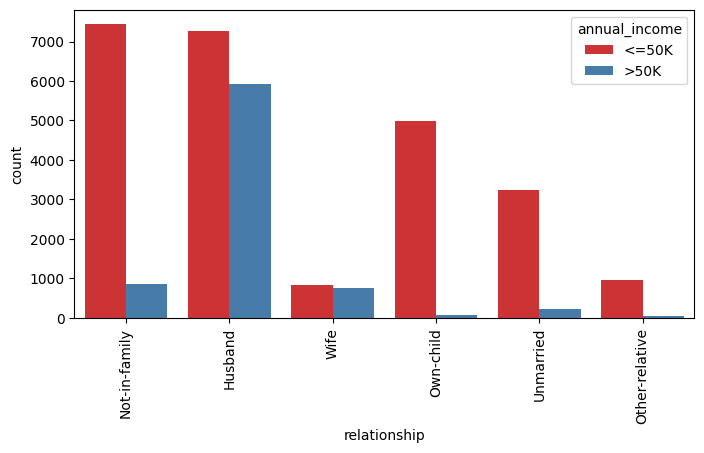

In [35]:
# Income VS Relationship
plt.figure(figsize=(8,4))

sns.countplot(x = df['relationship'], hue = df['annual_income'], palette='Set1')
plt.xticks(rotation = 90)
plt.show()

`Husband` & `Wife` have high chances of earning more than `>50K`.

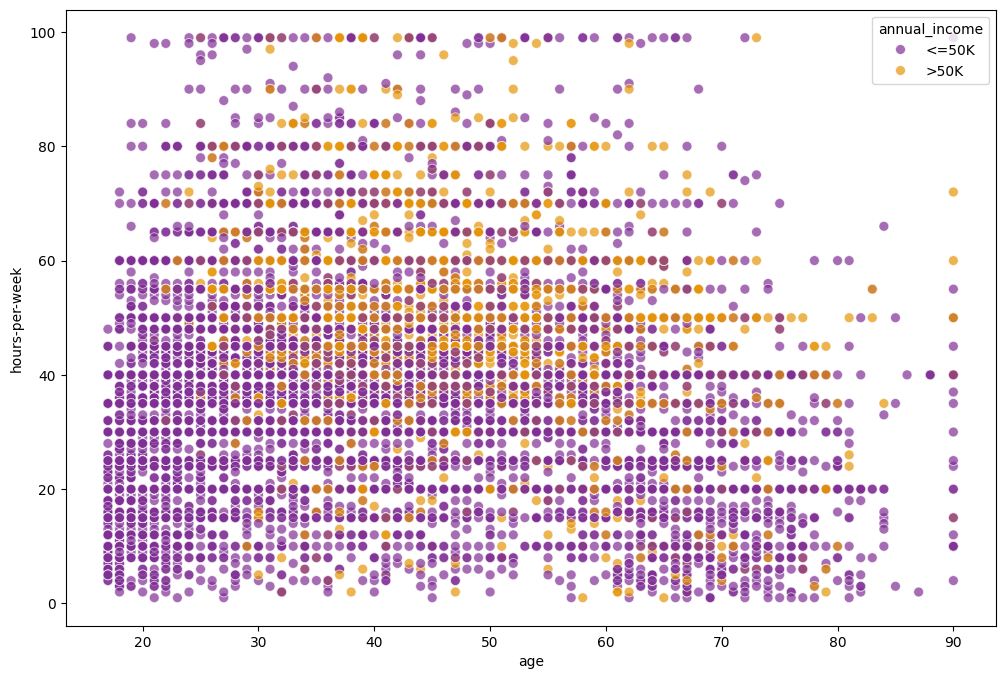

In [36]:
# hours-per-week and age vs Income
plt.figure(figsize=(12, 8))

sns.scatterplot(x= df['age'], y= df['hours-per-week'], hue= df['annual_income'] , palette= 'CMRmap', s=50, alpha=0.7)
plt.show()

- From the scatterplot between `age, hours_per_week and income`, we observe that a person needs to be `>30` to be earning more than `50K`, else needs to work at least `45-60 hours_per_week` to `earn >50K`.

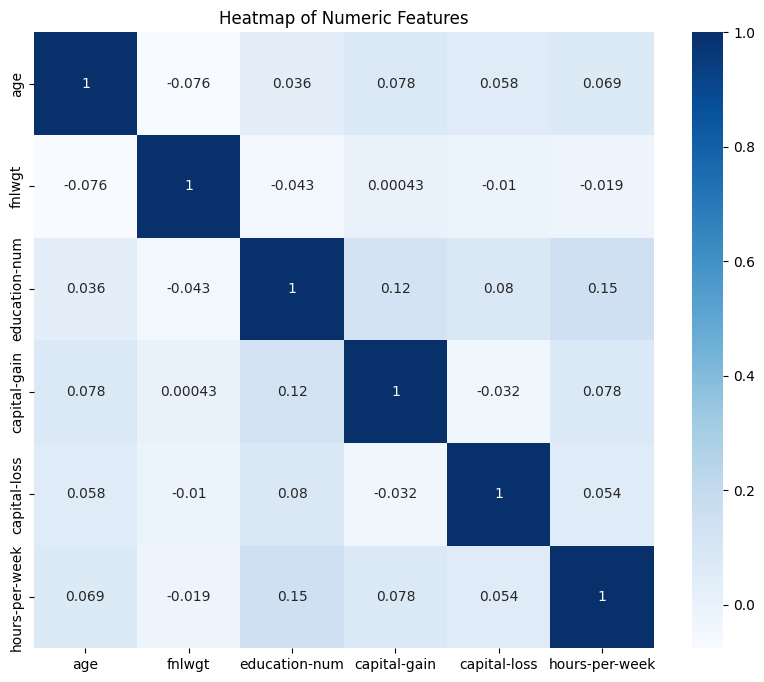

In [37]:
# Heatmap of Numeric Features

plt.figure(figsize=(10, 8))

numeric_df = df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
  
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.title('Heatmap of Numeric Features')
plt.show()

- Income has `34% correlation` with `Education_num`, `23% correlation` with `hours_per_week` and `age`, and 22% correlation with `Capital_gain`. The correlations are moderate.

## Combining the data logically to reduce categories.

### Workclass

In [38]:
df['workclass'].value_counts()

workclass
Private             24509
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

- Let's put `Never-worked` and `Without-pay` in one category and classify `State-gov` and `Local-gov` as `Gov`.

In [39]:
df['workclass'] = df['workclass'].replace({'Local-gov': 'Gov', 'State-gov': 'Gov', 'Never-worked': 'Without-pay'})

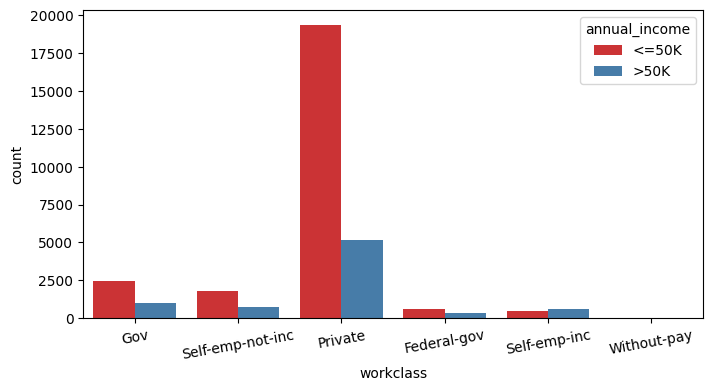

In [40]:
# Income VS Workclass
plt.figure(figsize=(8,4))

sns.countplot(x = df['workclass'], hue = df['annual_income'], palette='Set1')
plt.xticks(rotation = 10)
plt.show()

### Education

In [41]:
df['education'].value_counts()

education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64

- Let's combine all the columns relevant to schools in `School` category, then `Doctorate` and `Prof school` in a single category `Doctorate`, `Assoc-acdm` and `Assoc-voc` in one category `Assoc`, and `HS-Grad` and `Some-college` in one category `College`.

In [42]:
df['education'] = df['education'].replace({'Preschool': 'School', '1st-4th': 'School' , '5th-6th': 'School', '7th-8th': 'School', '9th': 'School', '10th': 'School', '11th': 'School', '12th': 'School', 'Prof-school': 'Doctorate', 'Assoc-acdm': 'Assoc', 'Assoc-voc': 'Assoc', 'HS-grad': 'College', 'Some-college': 'College'})

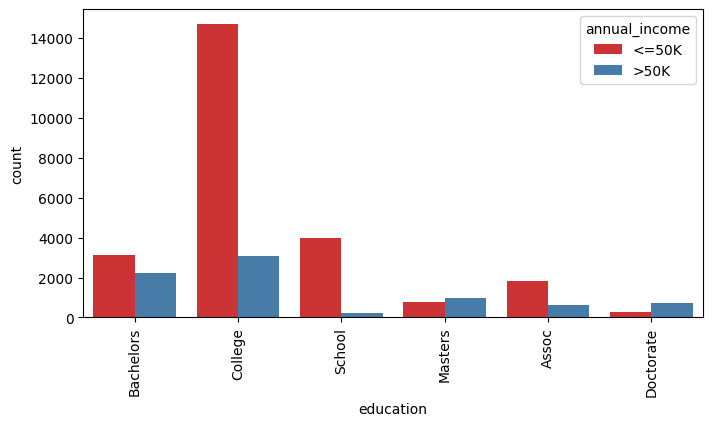

In [43]:
# Income VS Education
plt.figure(figsize=(8,4))

sns.countplot(x = df['education'], hue = df['annual_income'], palette='Set1')
plt.xticks(rotation = 90)
plt.show()

### Marital Status

In [44]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

- Let's combine `Divorced`, `Married-spouse-absent`, `Separated`, `Widowed` and `Married-AF-Spouse` to one category and name it as `No spouse`.

In [45]:
df['marital-status'] = df['marital-status'].replace({'Divorced' : 'No spouse', 'Married-spouse-absent' : 'No spouse', 'Separated' : 'No spouse', 'Divorced' : 'No spouse', 'Widowed' : 'No spouse', 'Married-AF-spouse' : 'No spouse'})

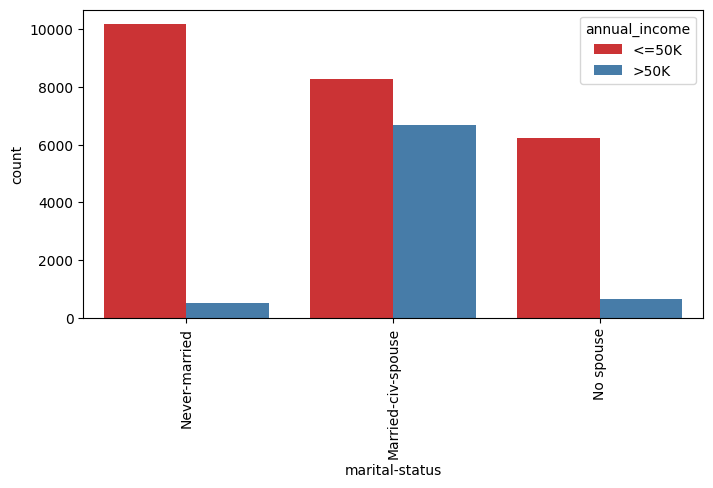

In [46]:
# Income VS Relationship
plt.figure(figsize=(8,4))

sns.countplot(x = df['marital-status'], hue = df['annual_income'], palette='Set1')
plt.xticks(rotation = 90)
plt.show()

### Relationship column

In [47]:
df['relationship'].value_counts()

relationship
Husband           13187
Not-in-family      8292
Own-child          5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: count, dtype: int64

- We combine `Not-in-family`, `Own-child`, `Unmarried` and `Other-relative` columns to a single category looking at the distributions, and name is as `Other`.

In [48]:
df['relationship'] = df['relationship'].replace({'Not-in-family' : 'Others', 'Unmarried' : 'Others', 'Own-child' : 'Others', 'Other-relative' : 'Others'})

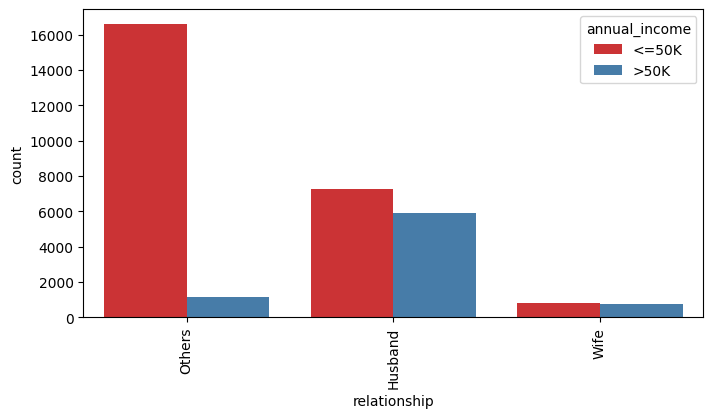

In [49]:
# Income VS Relationship
plt.figure(figsize=(8,4))

sns.countplot(x = df['relationship'], hue = df['annual_income'], palette='Set1')
plt.xticks(rotation = 90)
plt.show()

### Race column

In [50]:
df['race'].value_counts()

race
White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

- We combine the categories `Amer-Indian-Eskimo` and `Other` to `Others` category, since they have similar distributions.

In [51]:
df['race'] = df['race'].replace({'Amer-Indian-Eskimo' : 'Others', 'Other' : 'Others'})

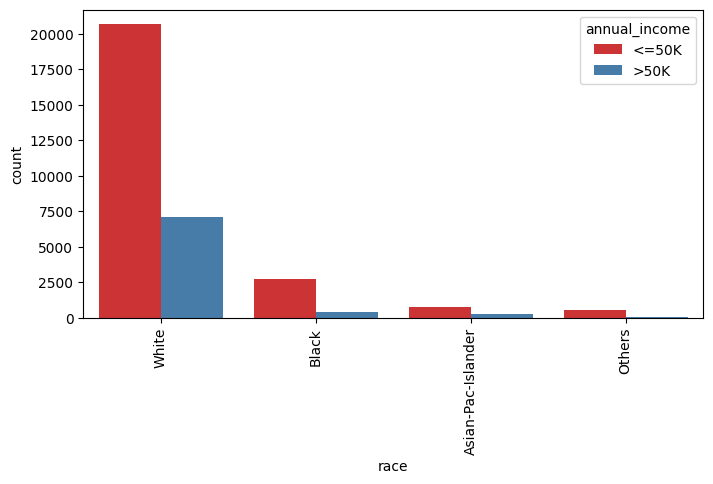

In [52]:
# Income VS Relationship
plt.figure(figsize=(8,4))

sns.countplot(x = df['race'], hue = df['annual_income'], palette='Set1')
plt.xticks(rotation = 90)
plt.show()

## Outlier Detection

In [53]:
# # Step 1: Identify numerical columns
# numerical_columns = df.select_dtypes(include=[np.number]).columns

# # Step 2: Remove outliers using IQR for each numerical column
# for col in numerical_columns:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1
    
#     # Outlier boundaries
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     # Filter out rows where numerical data falls outside the outlier boundaries
#     df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


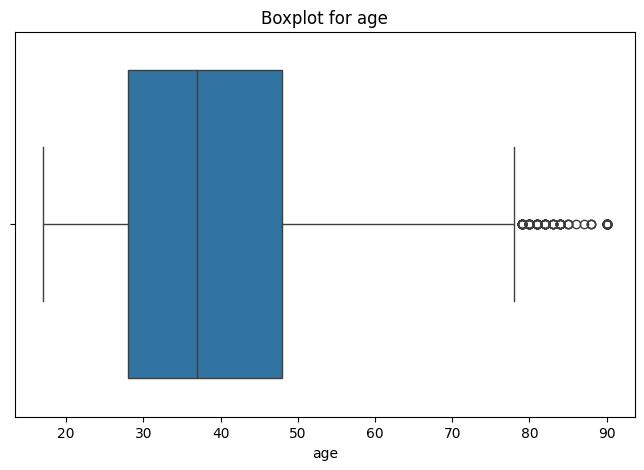

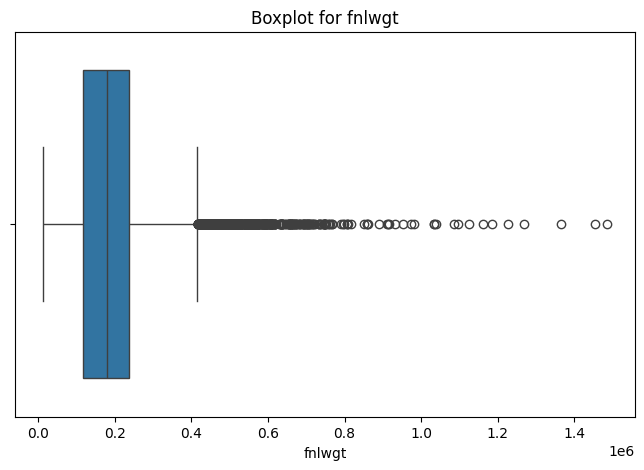

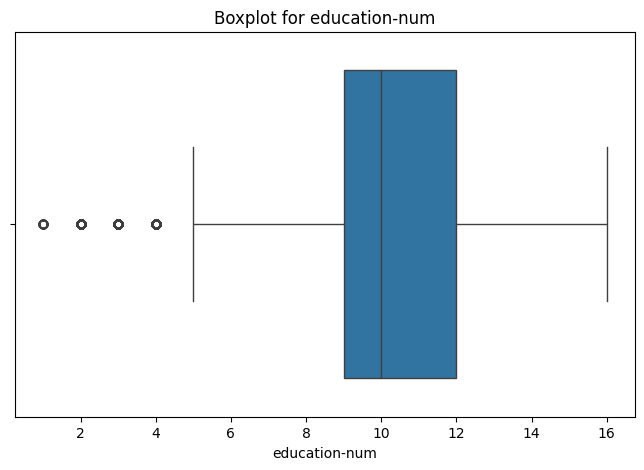

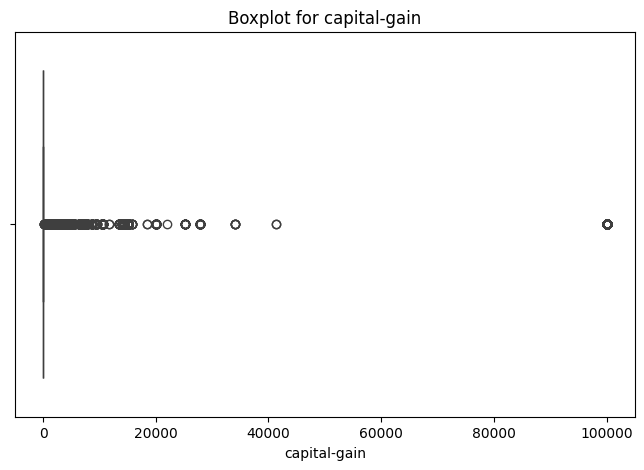

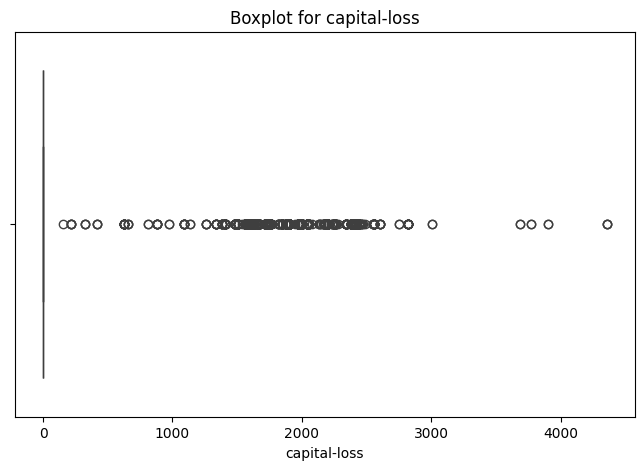

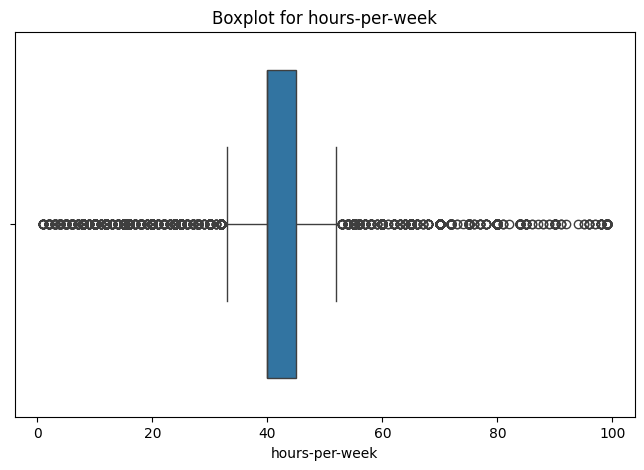

In [54]:
numerical_columns = df.select_dtypes(include=[np.number]).columns #Identify numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

- We can observe that their are `Outliers` present in all numerical columns. Let's see now if the data is normally distributed or not so that we can know how to treat the outliers. Either with `Z-score` or `IQR`.

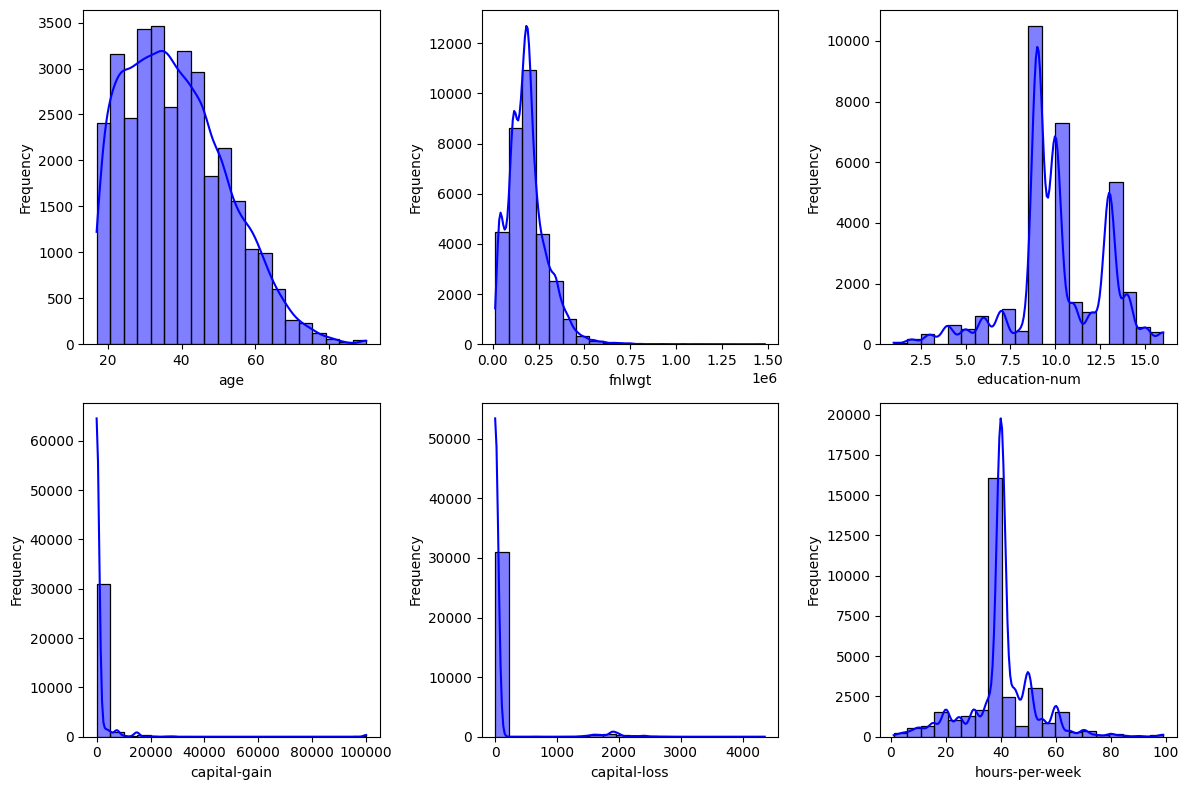

In [55]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)  # Create a 2x3 grid for the 6 columns
    sns.histplot(df[col], kde=True, bins=20, color='blue') 
#     plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

- Based on the Histogram, we can see that our data is not normally distributed so IQR is the best choice for identifying the Outliers because Z-score might not give accurate results because of the lack of normality in my dataset.

In [56]:
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers: Replace values below the lower bound with the lower bound and above the upper bound with the upper bound
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

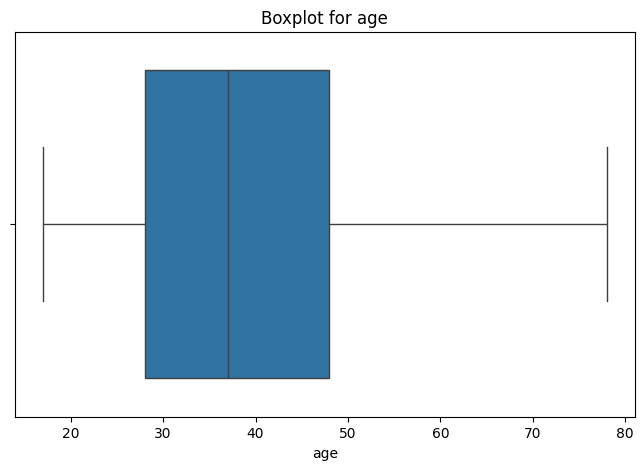

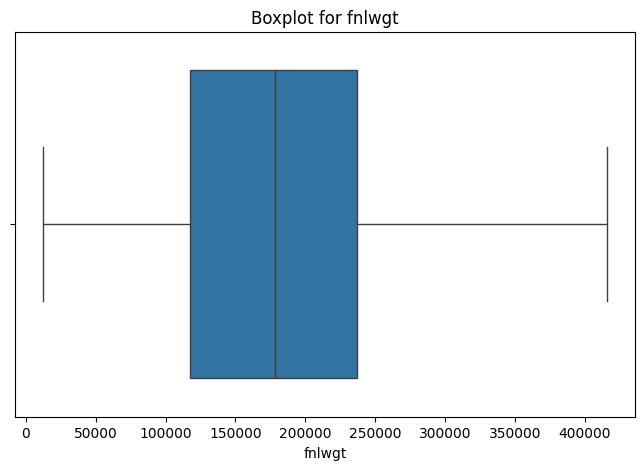

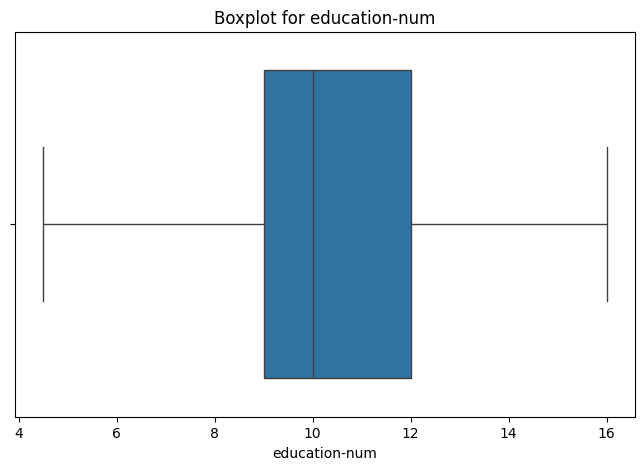

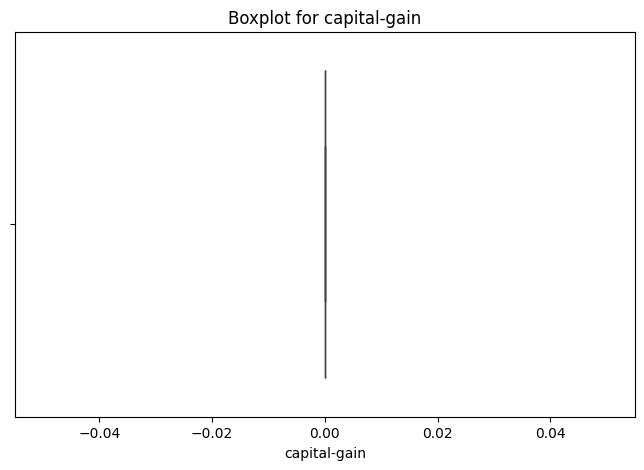

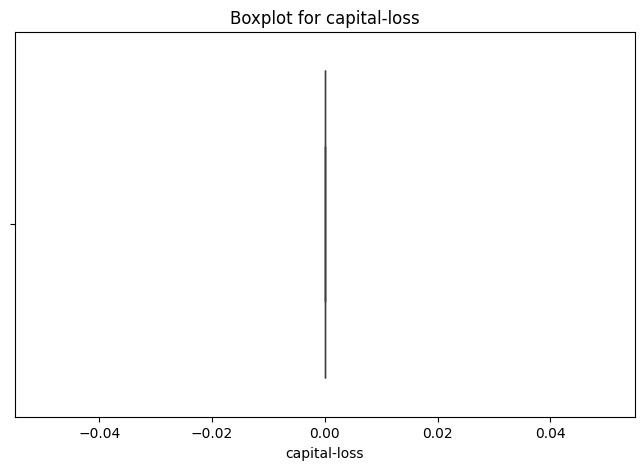

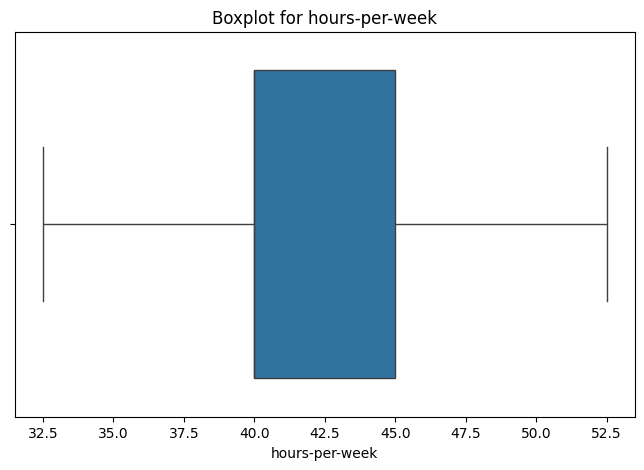

In [57]:
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32537 non-null  float64
 1   workclass       32537 non-null  object 
 2   fnlwgt          32537 non-null  float64
 3   education       32537 non-null  object 
 4   education-num   32537 non-null  float64
 5   marital-status  32537 non-null  object 
 6   occupation      32537 non-null  object 
 7   relationship    32537 non-null  object 
 8   race            32537 non-null  object 
 9   sex             32537 non-null  object 
 10  capital-gain    32537 non-null  float64
 11  capital-loss    32537 non-null  float64
 12  hours-per-week  32537 non-null  float64
 13  native-country  32537 non-null  object 
 14  annual_income   32537 non-null  object 
dtypes: float64(6), object(9)
memory usage: 4.0+ MB


## Skewness treatment

- We now proceed with treating skewness in our data, which allows us to fit our data in a symmetric distribution, which further allows our model to learn better.

In [59]:
columns = df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']]

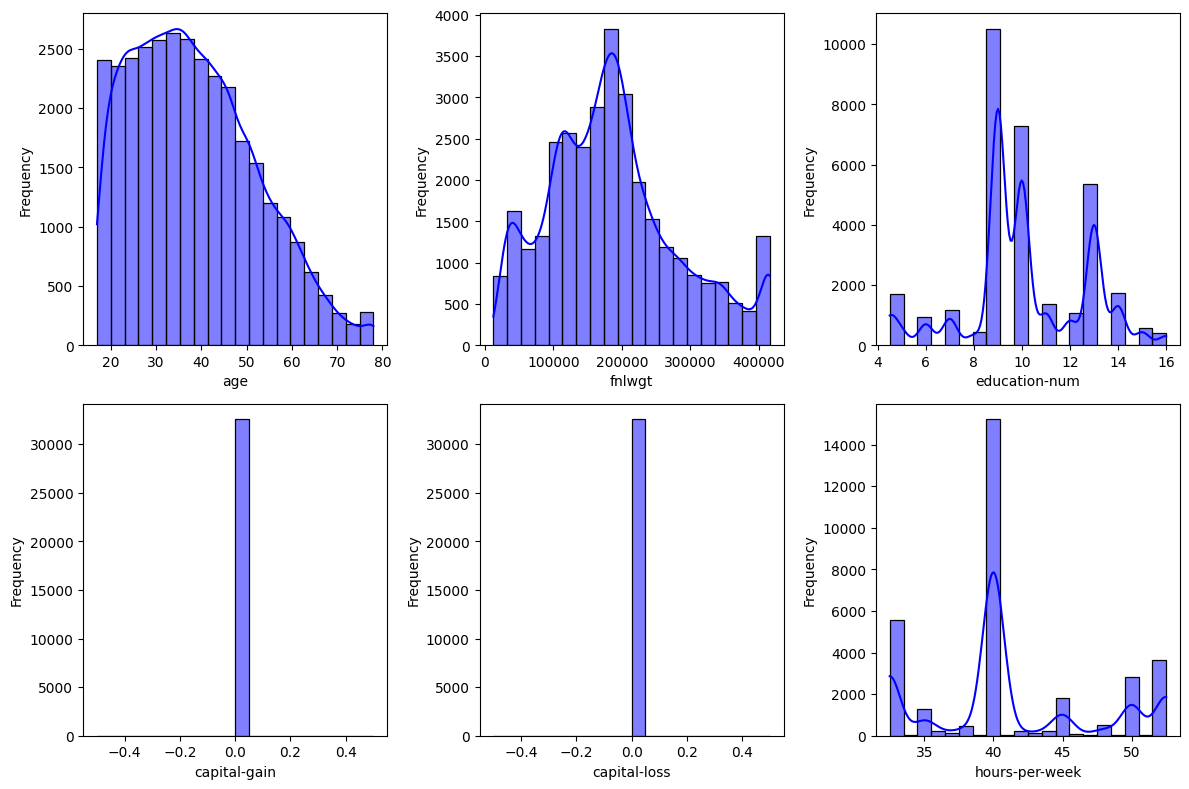

In [60]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns):
    plt.subplot(2, 3, i+1)  # Create a 2x3 grid for the 6 columns
    sns.histplot(df[col], kde=True, bins=20, color='blue') 
#     plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [61]:
columns.skew()

age               0.513435
fnlwgt            0.548158
education-num    -0.033530
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.438212
dtype: float64

- Columns `age`, `fnlwgt`, and `hours-per-week` have slightly positive skewness values, but they're not extreme and columns `education-num`, `capital-gain`, and `capital-loss` these are nearly symmetrical, so no transformation is required here. So We can proceed without transformations, as the skewness values indicate the distributions are already quite close to normal.

## Encoding the data

In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
Le = LabelEncoder()

In [64]:
df['workclass'] = Le.fit_transform(df['workclass'])
df['education'] = Le.fit_transform(df['education'])
df['marital-status'] = Le.fit_transform(df['marital-status'])
df['occupation'] = Le.fit_transform(df['occupation'])
df['relationship'] = Le.fit_transform(df['relationship'])
df['race'] = Le.fit_transform(df['race'])
df['sex'] = Le.fit_transform(df['sex'])
df['native-country'] = Le.fit_transform(df['native-country'])
df['annual_income'] = Le.fit_transform(df['annual_income'])

In [65]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39.0,1,77516.0,1,13.0,1,0,1,3,1,0.0,0.0,40.0,38,0
1,50.0,4,83311.0,1,13.0,0,3,0,3,1,0.0,0.0,32.5,38,0
2,38.0,2,215646.0,2,9.0,2,5,1,3,1,0.0,0.0,40.0,38,0
3,53.0,2,234721.0,5,7.0,0,5,0,1,1,0.0,0.0,40.0,38,0
4,28.0,2,338409.0,1,13.0,0,9,2,1,0,0.0,0.0,40.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,2,257302.0,0,12.0,0,12,2,3,0,0.0,0.0,38.0,38,0
32557,40.0,2,154374.0,2,9.0,0,6,0,3,1,0.0,0.0,40.0,38,1
32558,58.0,2,151910.0,2,9.0,2,0,1,3,0,0.0,0.0,40.0,38,0
32559,22.0,2,201490.0,2,9.0,1,0,1,3,1,0.0,0.0,32.5,38,0


## Spliting training and testing data


In [66]:
X = df.drop('annual_income', axis = 1)

In [67]:
Y = df['annual_income']

## Scaling the data

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [70]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.032472,-1.358652,-1.149209,-0.894767,1.168918,0.317397,-1.545209,0.625471,0.395889,0.703020,0.0,0.0,-0.194472,0.261131
1,0.844002,2.601909,-1.088284,-0.894767,1.168918,-0.962299,-0.790133,-1.126053,0.395889,0.703020,0.0,0.0,-1.406640,0.261131
2,-0.041304,-0.038465,0.303007,-0.157037,-0.457496,1.597093,-0.286749,0.625471,0.395889,0.703020,0.0,0.0,-0.194472,0.261131
3,1.065329,-0.038465,0.503550,2.056153,-1.270703,-0.962299,-0.286749,-1.126053,-2.195867,0.703020,0.0,0.0,-0.194472,0.261131
4,-0.779058,-0.038465,1.593665,-0.894767,1.168918,-0.962299,0.720018,2.376996,-2.195867,-1.422436,0.0,0.0,-0.194472,-5.355247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,-0.852834,-0.038465,0.740954,-1.632497,0.762315,-0.962299,1.475094,2.376996,0.395889,-1.422436,0.0,0.0,-0.517717,0.261131
32533,0.106247,-0.038465,-0.341170,-0.157037,-0.457496,-0.962299,-0.035058,-1.126053,0.395889,0.703020,0.0,0.0,-0.194472,0.261131
32534,1.434206,-0.038465,-0.367075,-0.157037,-0.457496,1.597093,-1.545209,0.625471,0.395889,-1.422436,0.0,0.0,-0.194472,0.261131
32535,-1.221711,-0.038465,0.154180,-0.157037,-0.457496,0.317397,-1.545209,0.625471,0.395889,0.703020,0.0,0.0,-1.406640,0.261131


## Train Test Split

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state= 3)

In [72]:
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, recall_score, f1_score,ConfusionMatrixDisplay,classification_report
import warnings

## Model 

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
}

In [74]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

results = {}
for model_name, model in models.items():
    print(f"Training and testing {model_name}...")
    model.fit(X_train, y_train)  # Train the model
    predictions = model.predict(X_test)  # Test the model
    
    # Metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)  
    f1 = f1_score(y_test, predictions)  
    
    # Store results
    results[model_name] = {"Accuracy": accuracy, "Precision": precision, "F1-Score": f1,}

Training and testing Logistic Regression...
Training and testing Random Forest...
Training and testing Decision Tree...


In [75]:
# Display results

print("\nModel Performance:")
for model_name, scores in results.items():
    print(f"{model_name}:")
    print(f"  Accuracy: {scores['Accuracy']:.2f}")
    print(f"  Precision: {scores['Precision']:.2f}")
    print(f"  F1-Score: {scores['F1-Score']:.2f}")
#     print(f"  Cross-Val Accuracy: {scores['Cross-Val Accuracy']:.2f}\n")


Model Performance:
Logistic Regression:
  Accuracy: 0.83
  Precision: 0.67
  F1-Score: 0.57
Random Forest:
  Accuracy: 0.83
  Precision: 0.65
  F1-Score: 0.60
Decision Tree:
  Accuracy: 0.79
  Precision: 0.54
  F1-Score: 0.55


C:\Users\Utkarsh kumar singh\AppData\Local\Temp\ipykernel_16624\1478530261.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="dark")


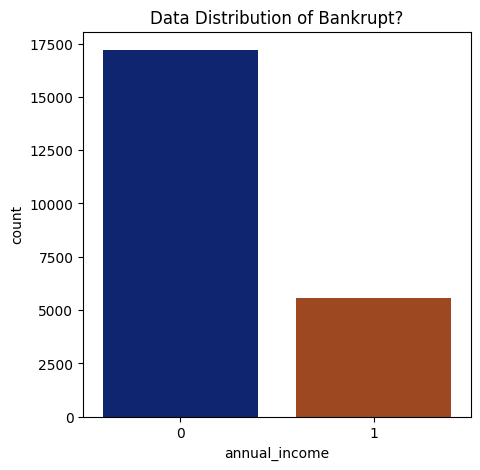

In [76]:
plt.figure(figsize=(5,5))
sns.countplot(x=y_train, palette="dark")
plt.title("Data Distribution of Bankrupt?")
plt.show()

In [77]:
y_train.value_counts()

annual_income
0    17207
1     5568
Name: count, dtype: int64

- It seems that my data is `Imbalanced`, which might be causing high accuracy due to the `majority class` dominating the predictions. So, let's apply `SMOTE` to balance the dataset.

In [78]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution before SMOTE:", y_train.value_counts())
print("Class distribution after SMOTE:", y_train_resampled.value_counts())

Class distribution before SMOTE: annual_income
0    17207
1     5568
Name: count, dtype: int64
Class distribution after SMOTE: annual_income
1    17207
0    17207
Name: count, dtype: int64


In [79]:
results = {}
for model_name, model in models.items():
    print(f"Training and testing {model_name}...")
    model.fit(X_train_resampled, y_train_resampled)  # Train the model
    predictions = model.predict(X_test)  # Test the model
    
    # Metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')  # Weighted for multi-class
    f1 = f1_score(y_test, predictions, average='weighted')  # Weighted for multi-class
#     cross_val = cross_val_score(model, X, y, cv=5).mean()  # Cross-validation score
    
    # Store results
    results[model_name] = {"Accuracy": accuracy, "Precision": precision, "F1-Score": f1,}

Training and testing Logistic Regression...
Training and testing Random Forest...
Training and testing Decision Tree...


In [80]:
# Display results
print("\nModel Performance:")
for model_name, scores in results.items():
    print(f"{model_name}:")
    print(f"  Accuracy: {scores['Accuracy']:.2f}")
    print(f"  Precision: {scores['Precision']:.2f}")
    print(f"  F1-Score: {scores['F1-Score']:.2f}")
#     print(f"  Cross-Val Accuracy: {scores['Cross-Val Accuracy']:.2f}\n")


Model Performance:
Logistic Regression:
  Accuracy: 0.78
  Precision: 0.84
  F1-Score: 0.79
Random Forest:
  Accuracy: 0.82
  Precision: 0.82
  F1-Score: 0.82
Decision Tree:
  Accuracy: 0.77
  Precision: 0.78
  F1-Score: 0.77


- We can see that `Random Forest` is better performing than other models with `82% Accuracy, Precision and F1-Score`.